In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities
from collections import Counter
from node2vec import Node2Vec
from algorithms import palla_algorithm_pytorch

/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = '../data/stanford/web-Stanford.txt'

# Initialize an empty directed graph
G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        # Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        # Build graph
        source, target = line.strip().split()[:2]
        G.add_edge(source, target)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 281903 nodes and 2312497 edges.


In [3]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")


Number of nodes: 281903
Number of edges: 2312497
Is the graph directed: True


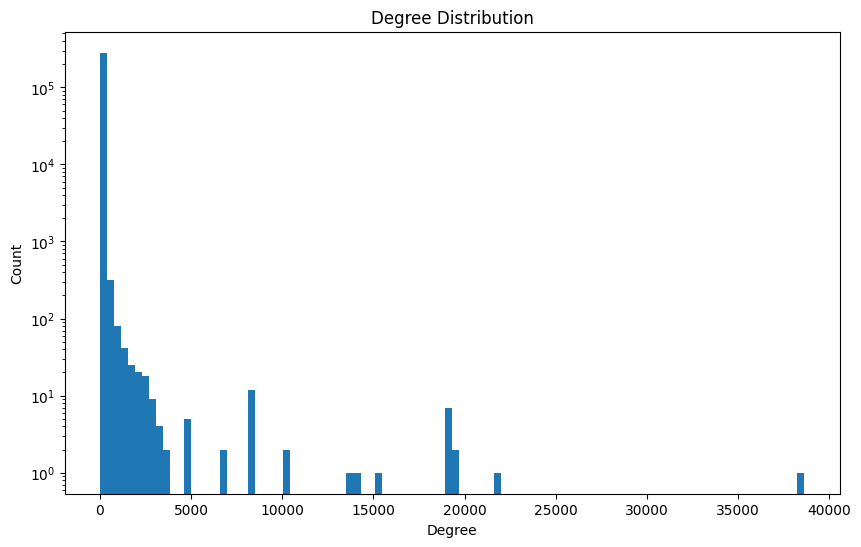

In [4]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, log=True)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


In [5]:
# Strongly connected components
strongly_connected_components = nx.strongly_connected_components(G)
largest_scc = max(strongly_connected_components, key=len)
print(f"Number of nodes in the largest strongly connected component: {len(largest_scc)}")

# Weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)
largest_wcc = max(weakly_connected_components, key=len)
print(f"Number of nodes in the largest weakly connected component: {len(largest_wcc)}")


Number of nodes in the largest strongly connected component: 150532
Number of nodes in the largest weakly connected component: 255265


In [6]:
# Compute PageRank for the nodes in the graph
pagerank = nx.pagerank(G, max_iter=100)

# Identify the node with the highest PageRank
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank = pagerank[max_pagerank_node]

print(f"Node with highest PageRank: {max_pagerank_node}, PageRank: {max_pagerank}")


Node with highest PageRank: 89073, PageRank: 0.010006381216752553


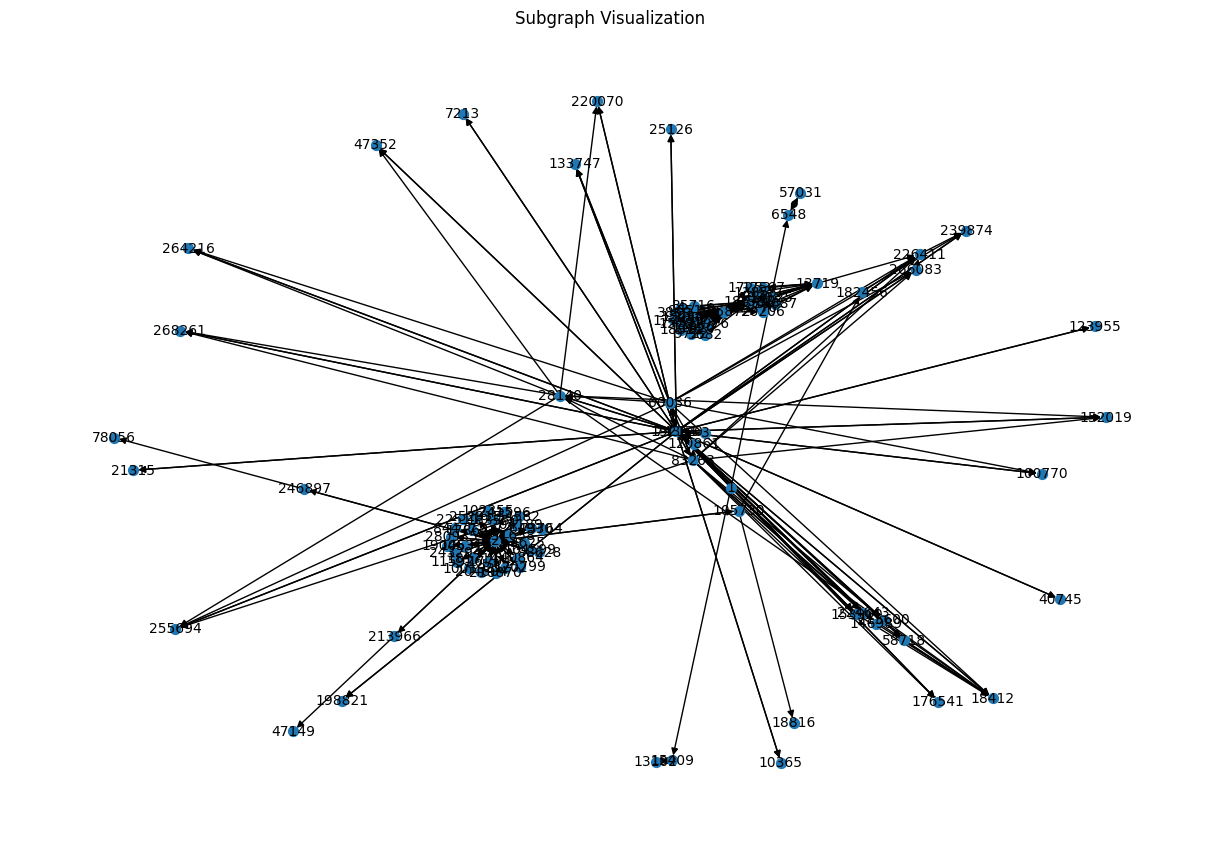

In [7]:
# Visualize a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=50, font_size=10)
plt.title("Subgraph Visualization")
plt.show()


# Louvain

In [9]:
# Convert to undirected graph for Louvain method
G_undirected = G.to_undirected()

# Run Louvain community detection
#louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)
#  PARAMETERS
#    G - NetworkX graph
#    weight -string or None, optional (default=”weight”) The name of an edge attribute that holds the numerical value used as a weight. If None then each edge has weight 1.
#    resolution - float, optional (default=1) If resolution is less than 1, the algorithm favors larger communities. Greater than 1 favors smaller communities
#    threshold - float, optional (default=0.0000001) Modularity gain threshold for each level. If the gain of modularity between 2 levels of the algorithm is less than the given threshold then the algorithm stops and returns the resulting communities.
#    seed - integer, random_state, or None (default) Indicator of random number generation state. See Randomness.

communities = louvain_communities(G_undirected, resolution=1, threshold=1e-07)
#Returns:list - A list of sets (partition of G). Each set represents one community and contains all the nodes that constitute it.

communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example


Community 0: Size 2678
Nodes: ['193202', '113049', '202574', '71994', '248194']
Community 1: Size 4
Nodes: ['180949', '41825', '76448', '13']
Community 2: Size 386
Nodes: ['83846', '113388', '111682', '226580', '232795']
Community 3: Size 26
Nodes: ['30', '15405', '31084', '6551', '68183']
Community 4: Size 414
Nodes: ['139326', '99231', '22853', '155339', '166648']
Community 5: Size 1518
Nodes: ['67831', '78992', '71678', '60648', '126212']
Community 6: Size 1246
Nodes: ['192422', '247313', '8038', '254580', '79645']
Community 7: Size 71
Nodes: ['279636', '69883', '171845', '277499', '202808']
Community 8: Size 59
Nodes: ['85380', '25353', '119487', '13836', '275425']
Community 9: Size 109
Nodes: ['65266', '85390', '28735', '155794', '44364']
Community 10: Size 15
Nodes: ['105220', '26415', '89748', '15441', '13033']
Community 11: Size 73
Nodes: ['23567', '57276', '260542', '44538', '132361']
Community 12: Size 20
Nodes: ['126277', '87942', '175', '72379', '27653']
Community 13: Size 

In [9]:
communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example

Community 0: Size 2671
Nodes: [5, 90117, 196615, 16395, 262157]
Community 1: Size 4
Nodes: [76448, 41825, 180949, 13]
Community 2: Size 111
Nodes: [16, 254483, 15396, 112166, 271915]
Community 3: Size 386
Nodes: [268291, 190468, 24584, 258066, 20]
Community 4: Size 72
Nodes: [244353, 95234, 139522, 61829, 274567]
Community 5: Size 414
Nodes: [225280, 266242, 239629, 196624, 245793]
Community 6: Size 175
Nodes: [11276, 4623, 232978, 95764, 213012]
Community 7: Size 144
Nodes: [67074, 187396, 201221, 81412, 105990]
Community 8: Size 32
Nodes: [240775, 209802, 170515, 113043, 184341]
Community 9: Size 1210
Nodes: [16384, 102401, 104453, 43016, 169994]
Community 10: Size 71
Nodes: [51586, 195970, 161156, 248837, 72964]
Community 11: Size 109
Nodes: [144899, 81414, 37383, 21010, 110104]
Community 12: Size 648
Nodes: [167941, 12295, 204807, 143370, 280588]
Community 13: Size 15
Nodes: [105220, 93545, 19914, 13033, 57130]
Community 14: Size 1298
Nodes: [245762, 163846, 155663, 139280, 221203]

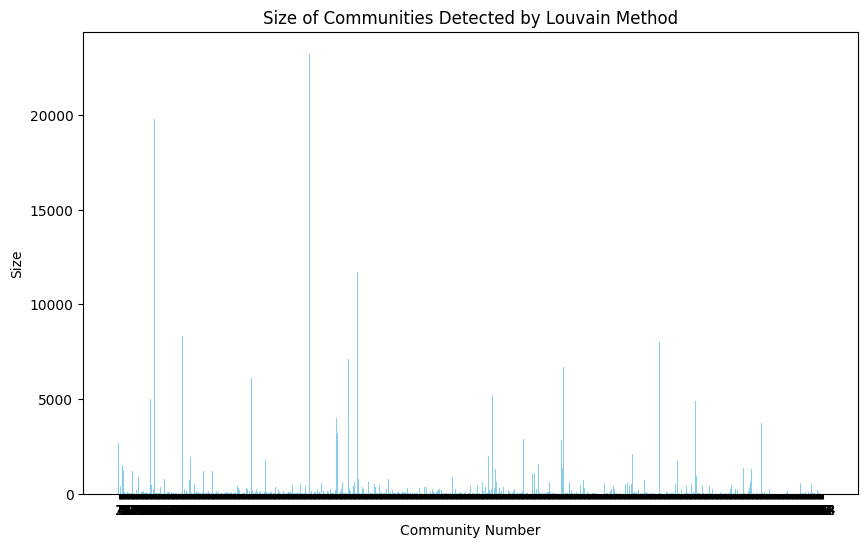

In [10]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities_sizes)), communities_sizes, color='skyblue')
plt.xlabel('Community Number')
plt.ylabel('Size')
plt.title('Size of Communities Detected by Louvain Method')
plt.xticks(range(len(communities_sizes)), [f"{i+1}" for i in range(len(communities_sizes))])
plt.show()

Number of Communities 864


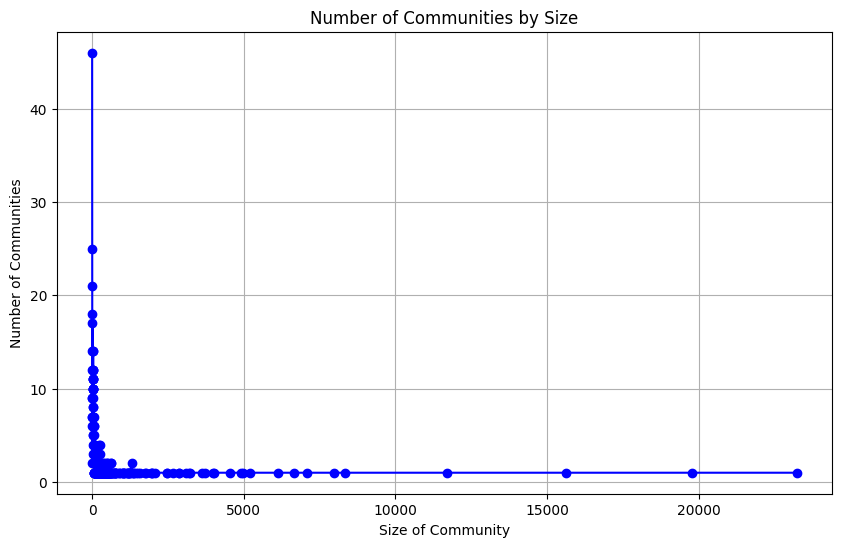

In [11]:
print('Number of Communities', len(communities_sizes))

# Counting the number of communities of each size
size_counts = Counter(communities_sizes)

# Sorting the sizes for plotting
sorted_sizes = sorted(size_counts.keys())
counts = [size_counts[size] for size in sorted_sizes]

# Plotting the number of communities by their size
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, counts, marker='o', linestyle='-', color='blue')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size')
plt.grid(True)
plt.show()

In [15]:
len(size_counts)

297

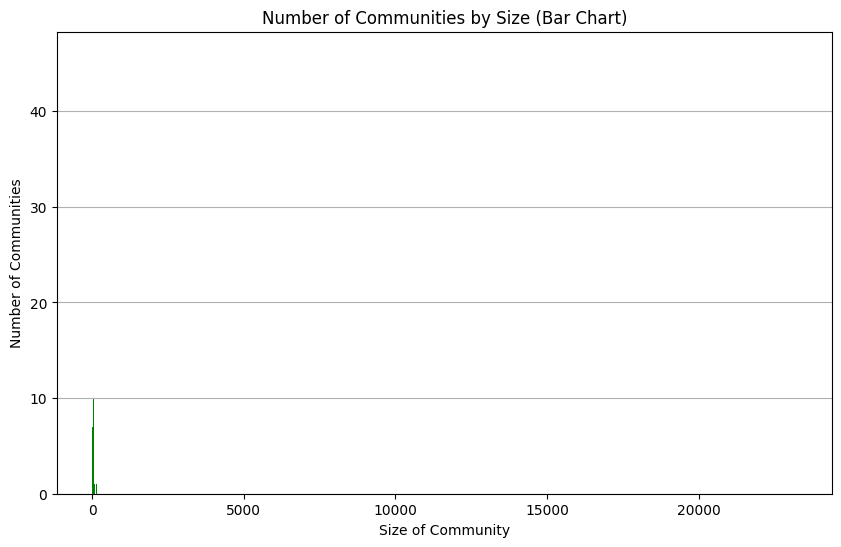

In [12]:
# Plotting the number of communities by their size using a bar chart for clearer visualization
plt.figure(figsize=(10, 6))
plt.bar(sorted_sizes, counts, color='green')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size (Bar Chart)')
plt.grid(axis='y')
plt.show()

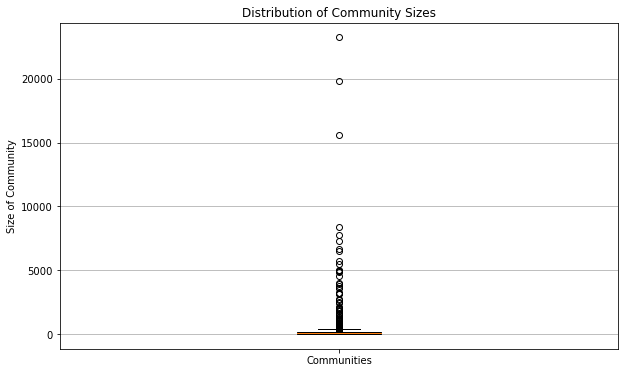

In [14]:
# Generate a box plot for the community sizes
plt.figure(figsize=(10, 6))
plt.boxplot(communities_sizes, vert=True, patch_artist=True)
plt.title('Distribution of Community Sizes')
plt.ylabel('Size of Community')
plt.xticks([1], ['Communities'])  # Only one category, "Communities"
plt.grid(axis='y')
plt.show()

## Machine Learning Approaches

In [19]:
from sklearn.cluster import KMeans

def obtain_kmeans(G, embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)
    labels = kmeans.labels_
    return labels

In [34]:
grid = {'dims': [8, 32, 64], 'length': [10, 30, 50]}
graphs = ['0', '107', '1912']
for name in graphs:
  G2 = nx.read_edgelist(f'../data/facebook/{name}.edges')
  for d in grid['dims']:
    for l in grid['length']:
        node2vec = Node2Vec(G2, dimensions=d, walk_length=l, num_walks=200, workers=4)
        model = node2vec.fit(window=10, min_count=1, batch_words=4)
        embeddings = model.wv.vectors
        np.save(f'node2vec/node2vec_embeddings_{name}_{d}_{l}.npy', embeddings)

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


Number of nodes: 333
Number of edges: 2519
Number of nodes: 1034
Number of edges: 26749
Number of nodes: 747
Number of edges: 30025


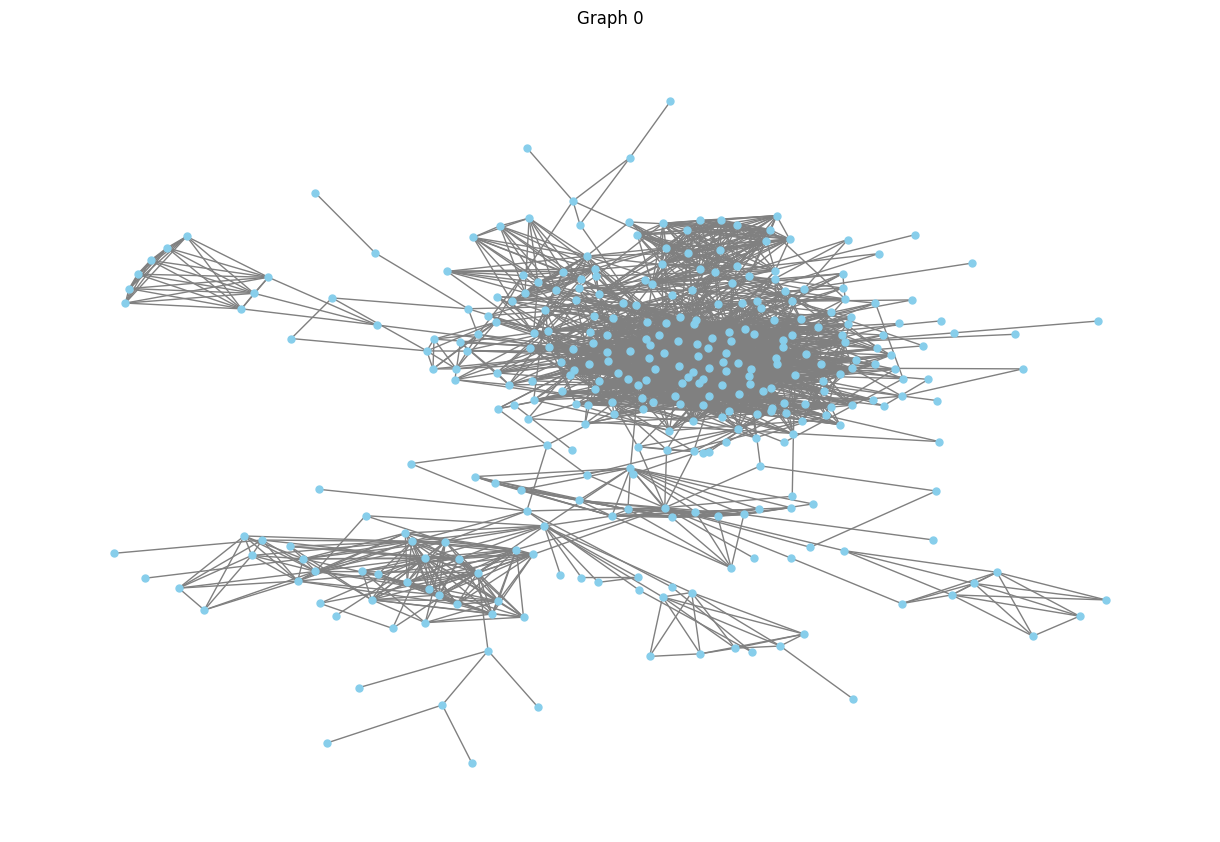

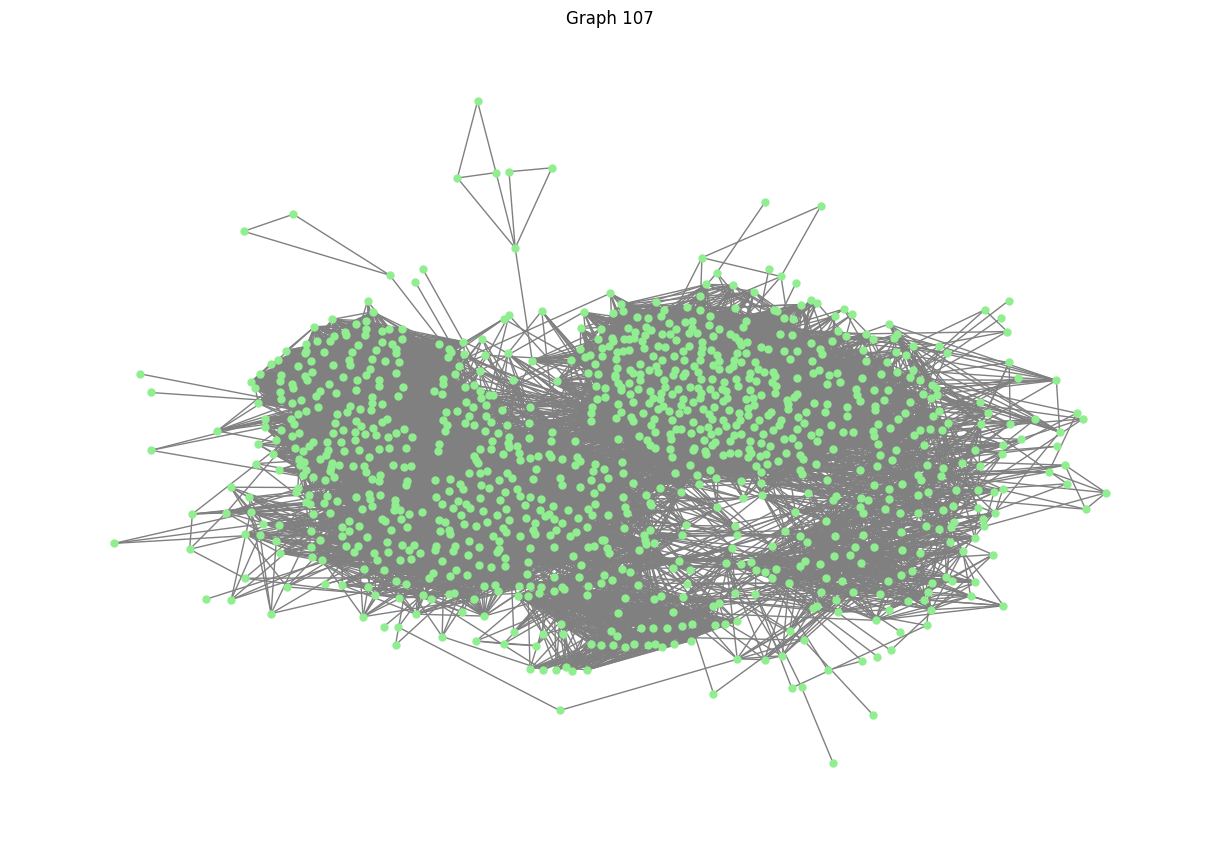

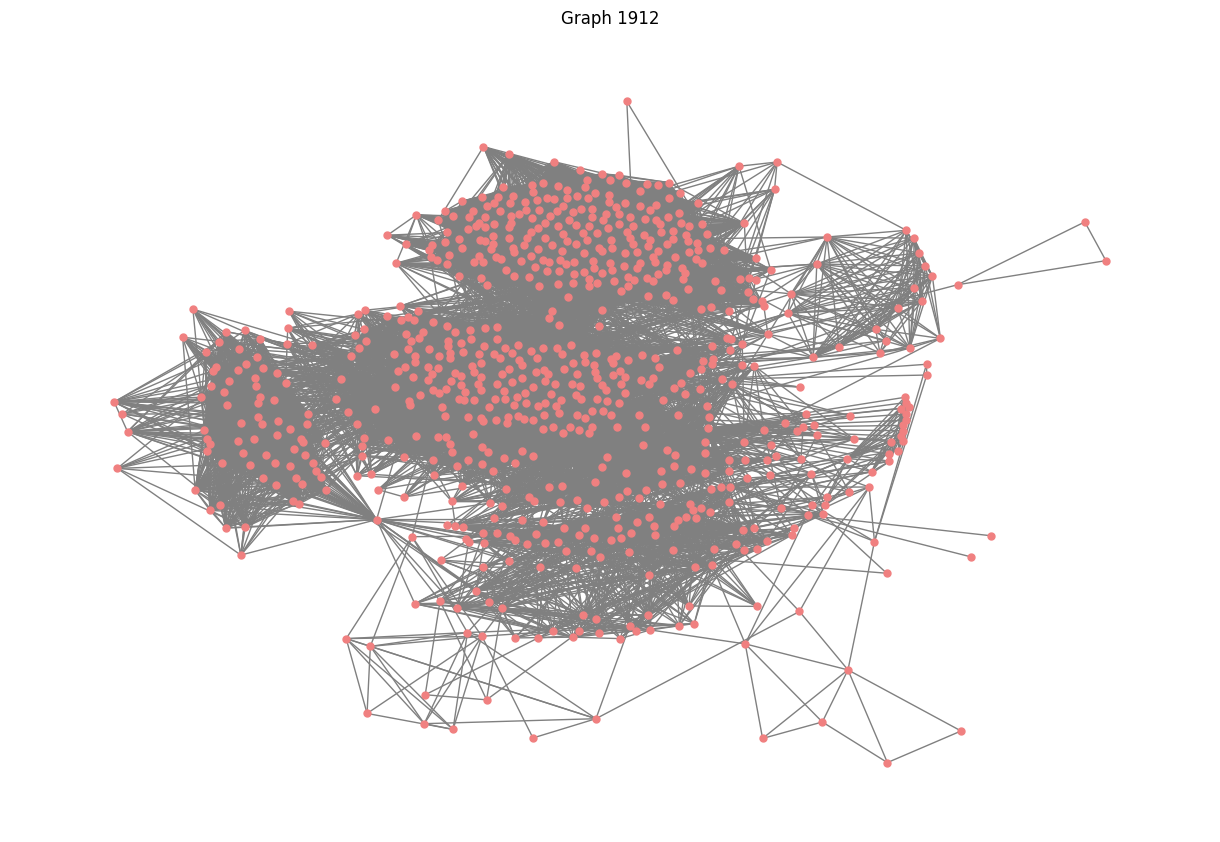

In [17]:
# Show some statistics about G2
graphs = ['0', '107', '1912']
colors = {'0': 'skyblue', '107': 'lightgreen', '1912': 'lightcoral'}
for name in graphs:
    G2 = nx.read_edgelist(f'../data/facebook/{name}.edges')
    print(f"Number of nodes: {G2.number_of_nodes()}")
    print(f"Number of edges: {G2.number_of_edges()}")
    # Save an image of the graph
    plt.figure(figsize=(12, 8))
    pos = nx.kamada_kawai_layout(G2)
    nx.draw(G2, pos=pos, node_size=25, node_color=colors[name], edge_color='gray', with_labels=False)
    plt.title(f"Graph {name}")
    plt.savefig(f'graph_{name}.png')


In [34]:
from community import community_louvain

def compute_metrics(G2, partition):
    # Prepare a mapping from community ID to the list of nodes in that community
    communities = {}
    for node, community_id in partition.items():
        communities.setdefault(community_id, []).append(node)
    
    # Initialize metrics
    total_density = 0
    total_conductance = 0
    total_community_clustering = 0
    
    for community_id, nodes in communities.items():
        # Create a subgraph for this community
        subgraph = G2.subgraph(nodes)
        
        # Density
        density = nx.density(subgraph)
        total_density += density
        
        # Clustering Coefficient for the community
        community_clustering = nx.average_clustering(subgraph)
        total_community_clustering += community_clustering
        
        # Conductance
        boundary_edges = list(nx.edge_boundary(G2, nodes))
        conductance = len(boundary_edges) / subgraph.size(weight='weight') if subgraph.size(weight='weight') > 0 else 0
        total_conductance += conductance
    
    # Calculate average metrics across all communities
    avg_density = total_density / len(communities)
    avg_conductance = total_conductance / len(communities)
    avg_community_clustering = total_community_clustering / len(communities)
    
    # Clustering Coefficient for the entire graph
    clustering_coefficient = nx.average_clustering(G2)
    
    # Modularity
    modularity = community_louvain.modularity(partition, G2)
    
    return modularity, clustering_coefficient, avg_density, avg_conductance, avg_community_clustering

In [37]:
from networkx.algorithms import community
# louvain 
from community import community_louvain

grid = {'dims': [8, 32, 64], 'length': [10, 30, 50]}
graphs = ['0', '107', '1912']

data = {}

for name in graphs:
    G2 = nx.read_edgelist(f'../data/facebook/{name}.edges')
    partition = community_louvain.best_partition(G2)

    modularity, clustering_coefficient, density, conductance, community_clustering_coefficient = compute_metrics(G2, partition)
    
    data[name] = {}
    data[name]['louvain'] = {'modularity': modularity, 'n_communities': len(set(partition.values())), 'clustering_coefficient': clustering_coefficient, 'density': density, 'conductance': conductance, 'community_clustering_coefficient': community_clustering_coefficient}
    
    # Palla with k=4
    if name == '0':
        try:
            partition_palla = palla_algorithm_pytorch(G2, 4)
            assignation = {node: -1 for node in G2.nodes()}
            for i, cluster in enumerate(partition_palla):
                for node in cluster:
                    assignation[node] = i

            modularity, clustering_coefficient, density, conductance, community_clustering_coefficient = compute_metrics(G2, assignation)
            data[name]['palla'] = {'modularity': modularity, 'n_communities': len(set(assignation.values())), 'clustering_coefficient': clustering_coefficient, 'density': density, 'conductance': conductance, 'community_clustering_coefficient': community_clustering_coefficient}
        except:
            print('Palla method failed: the graph is too large and does not fit in GPU memory')

    best_params = {'dims': 0, 'length': 0, 'modularity': -10}
    data[name]['node2vec'] = {}
    for d in grid['dims']:
        for l in grid['length']:
            embeddings_fb = np.load(f'node2vec/node2vec_embeddings_{name}_{d}_{l}.npy')
            n_cluster = len(set(partition.values()))
            labels = obtain_kmeans(G2, embeddings_fb, n_cluster)
            node_list = list(G2.nodes())
            node_to_cluster = {node: label for node, label in zip(node_list, labels)}
            clusters = {}
            for node, cluster_label in node_to_cluster.items():
                if cluster_label not in clusters:
                    clusters[cluster_label] = [node]
                else:
                    clusters[cluster_label].append(node)
            clusters_list = list(clusters.values())
            clusters_sets = [set(cluster) for cluster in clusters_list]
            modularity = community.modularity(G2, clusters_sets)
            if modularity > best_params['modularity']:
                best_params['modularity'] = modularity
                best_params['dims'] = d
                best_params['length'] = l

            modularity, clustering_coefficient, density, conductance, community_clustering_coefficient = compute_metrics(G2, node_to_cluster)
            data[name]['node2vec']['()'+str(d)+','+str(l)+')'] = {'modularity': modularity, 'n_communities': len(set(labels)), 'clustering_coefficient': clustering_coefficient, 'density': density, 'conductance': conductance, 'community_clustering_coefficient': community_clustering_coefficient}

    print(f'Best parameters for the graph {name}: {best_params}')

# Save the results as csv
import pandas as pd
df = pd.DataFrame(data)
df.to_csv('results.csv')

/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Best parameters for the graph 0: {'dims': 8, 'length': 10, 'modularity': 0.005096873132986474}


/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Best parameters for the graph 107: {'dims': 32, 'length': 30, 'modularity': 0.011967458813281939}


/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Best parameters for the graph 1912: {'dims': 64, 'length': 50, 'modularity': 0.007704538197075558}


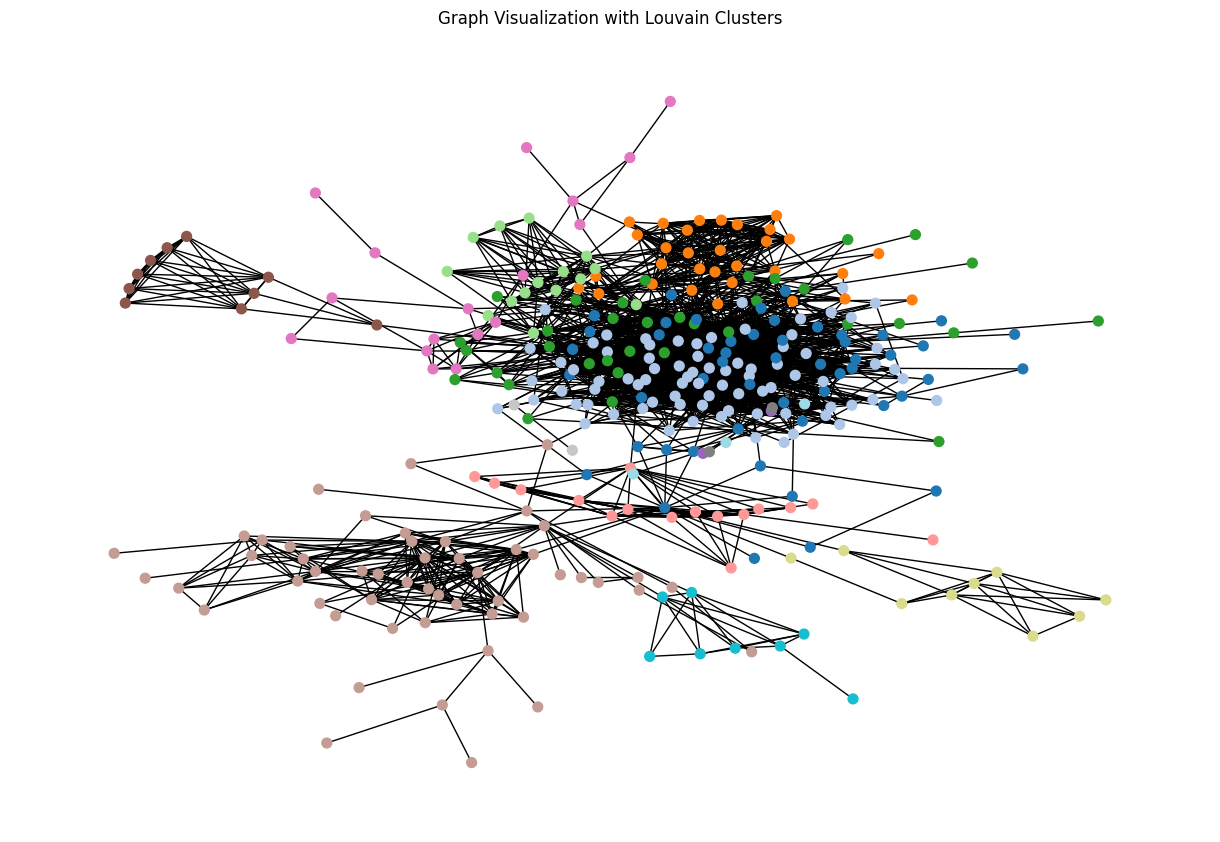

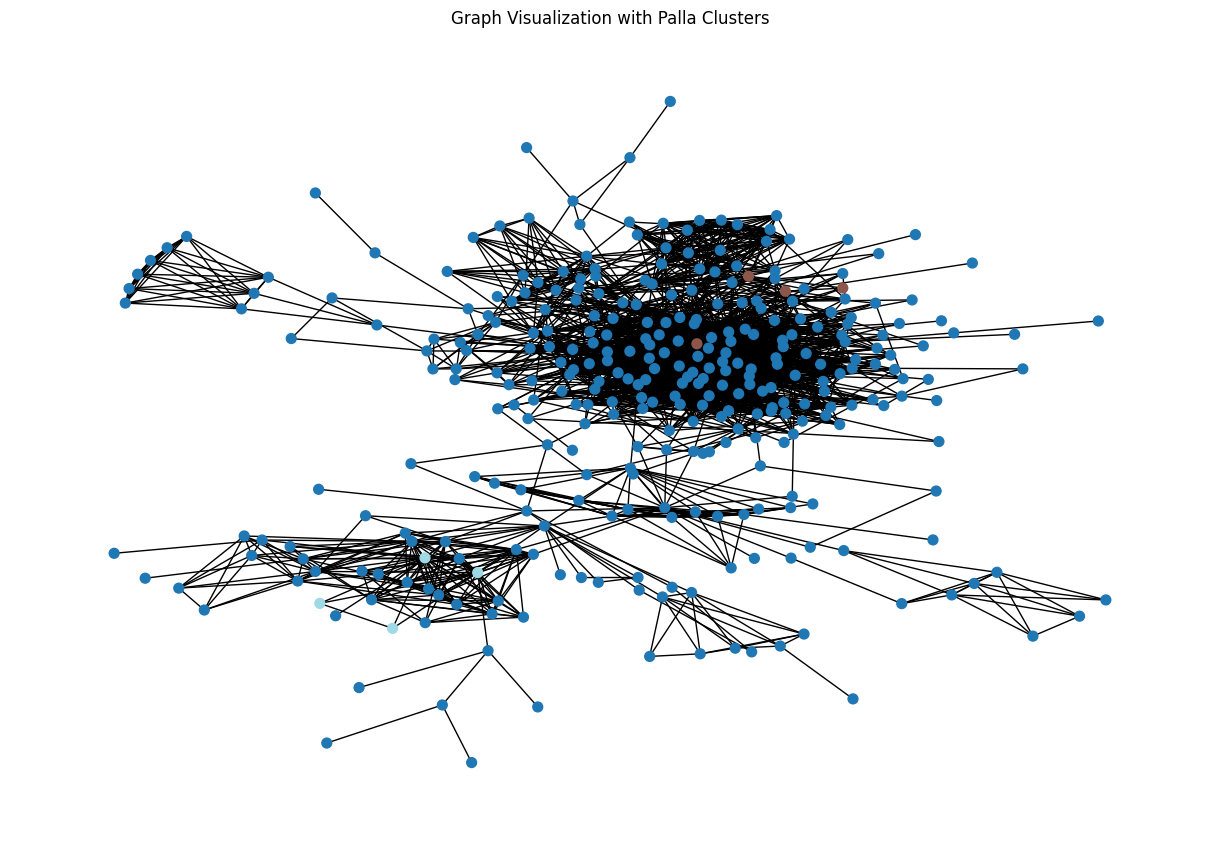

/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


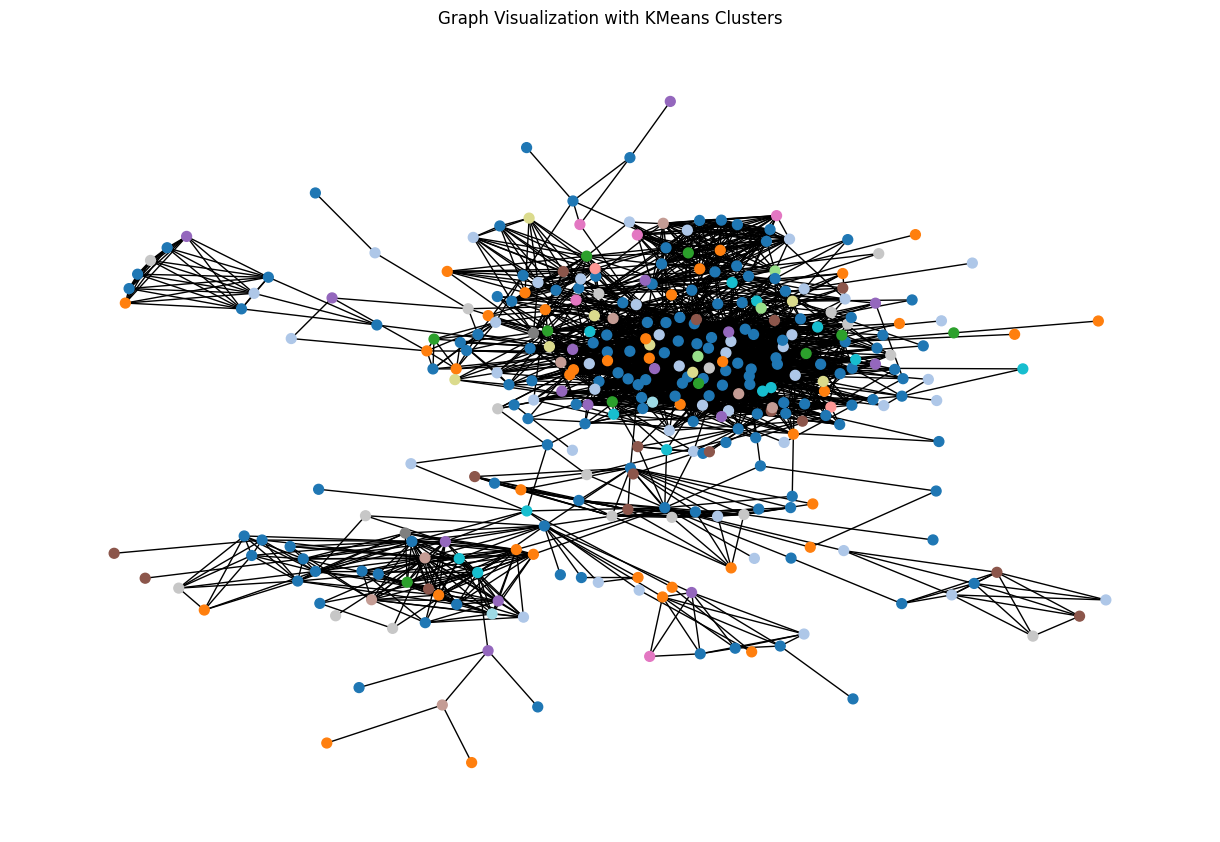

In [44]:
G2 = nx.read_edgelist('../data/facebook/0.edges')

# Visualize the graph with each node colored by its cluster for both the Louvain and KMeans methods
# Louvain
partition = community_louvain.best_partition(G2)
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G2)
nx.draw(G2, pos=pos, node_color=list(partition.values()), cmap='tab20', node_size=50)
plt.title('Graph Visualization with Louvain Clusters')
plt.show()

# Palla
partition_palla = palla_algorithm_pytorch(G2, 4)
assignation = {node: -1 for node in G2.nodes()}
for i, cluster in enumerate(partition_palla):
    for node in cluster:
        assignation[node] = i
plt.figure(figsize=(12, 8))
nx.draw(G2, pos=pos, node_color=list(assignation.values()), cmap='tab20', node_size=50)
plt.title('Graph Visualization with Palla Clusters')
plt.show()

# KMeans
embeddings_fb = np.load(f'node2vec/node2vec_embeddings_0_8_10.npy')
labels = obtain_kmeans(G2, embeddings_fb, len(set(partition.values())))
plt.figure(figsize=(12, 8))
nx.draw(G2, pos=pos, node_color=labels, cmap='tab20', node_size=50)
plt.title('Graph Visualization with KMeans Clusters')
plt.show()

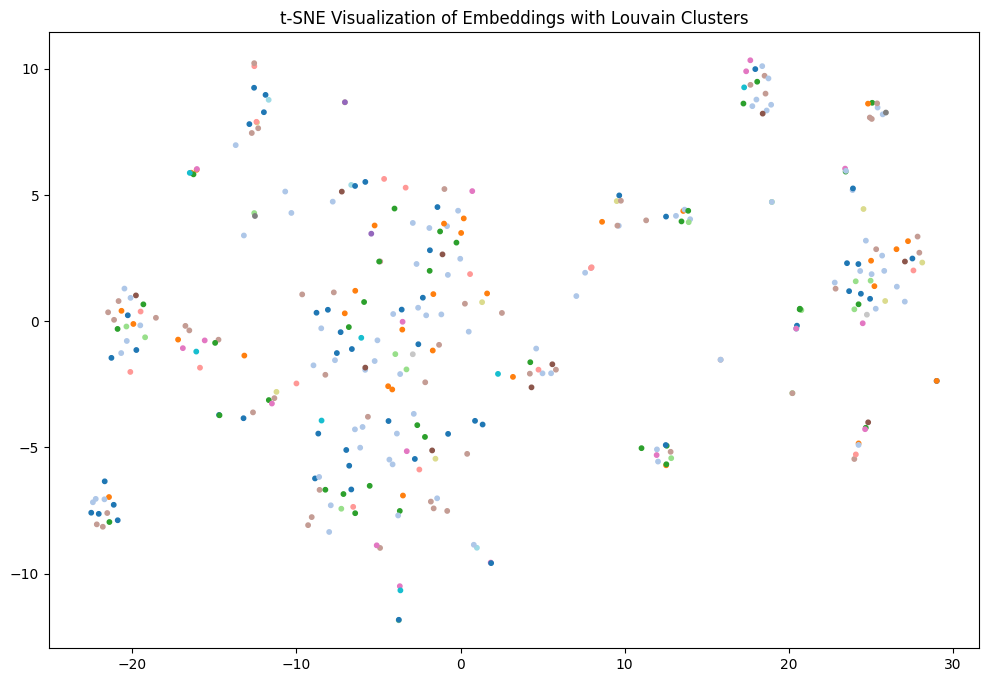

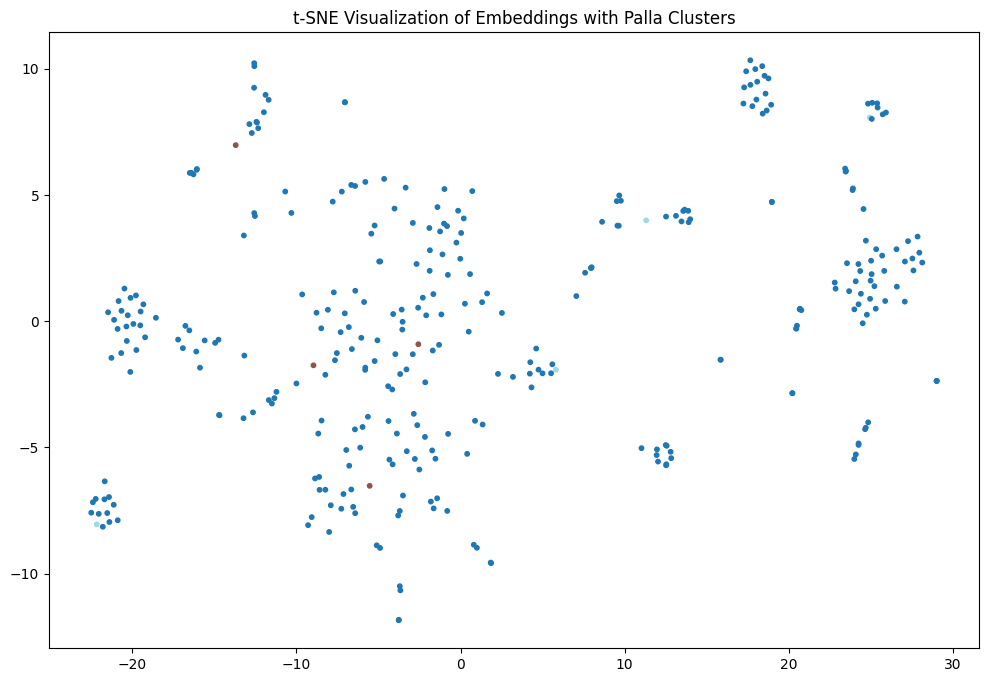

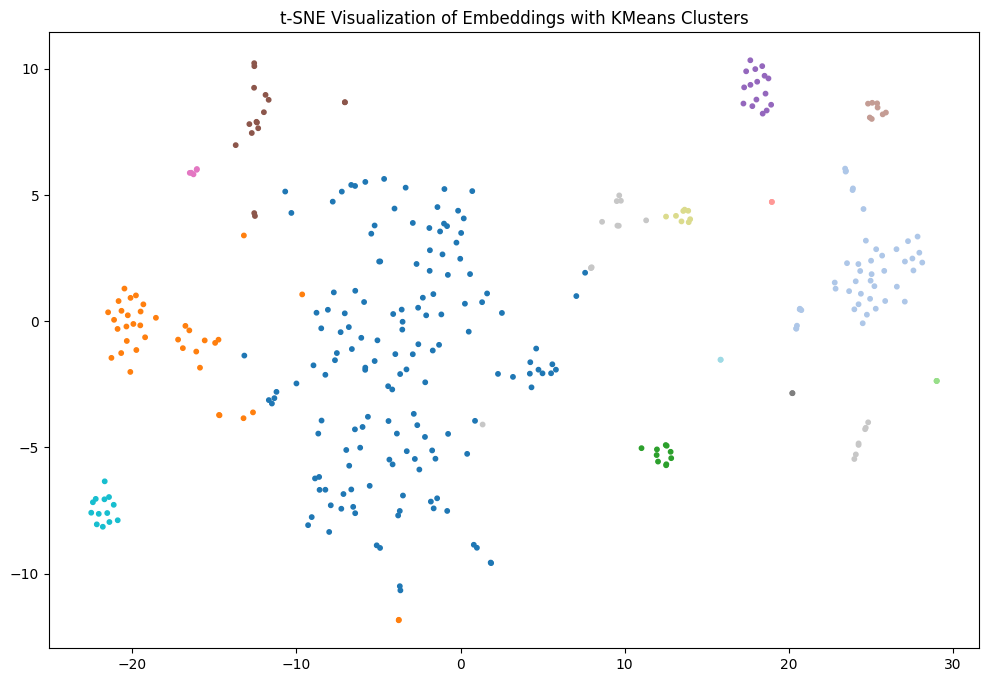

In [45]:
# Visualize the same, but in the embedding space, using the 2D t-SNE projection
from sklearn.manifold import TSNE

# Project the embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings_fb)

# Louvain
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=list(partition.values()), cmap='tab20', s=10)
plt.title('t-SNE Visualization of Embeddings with Louvain Clusters')
plt.show()

# Palla
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=list(assignation.values()), cmap='tab20', s=10)
plt.title('t-SNE Visualization of Embeddings with Palla Clusters')
plt.show()

# KMeans
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab20', s=10)
plt.title('t-SNE Visualization of Embeddings with KMeans Clusters')
plt.show()